# Generate a table of winding factors for various slot/pole combinations

This notebook shows how to compute a table to compare the winding factors of different windings

In [22]:
from dolomites import koil
import numpy as np
m = 3
p = [1, 2, 3, 4, 5, 6,7]     # number of pole pairs
Q = [3, 6, 9, 12, 15, 18,21] # number of slots

# we consider bot single and double layer possibility
kw_1l = np.zeros((len(Q),len(p)))
kw_2l = np.zeros((len(Q),len(p)))


for i in range(len(Q)):
    for j in range(len(p)):
        
        sos = koil.star_of_slot(m, Q[i], p[j]);
        sos.create_sectors();
        # check about winding feasibility
        if (sos.t < 0): # the winding is not feasible
            kw_1l[i][j] = -1
            kw_2l[i][j] = -1
            continue

        # we create an ampty winding
        w_1l = koil.m_phase_winding()
        w_2l = koil.m_phase_winding()

        # we ask the sos to populate the winding
        sos.populate_winding(w_1l,single_layer=True);
        sos.populate_winding(w_2l,single_layer=False);

        # we can then get winding factors (for the main harmonic)
        _kw_1l = w_1l.windings[0].get_kw()
        _kw_2l = w_2l.windings[0].get_kw()
        
        # we store the results in a table

        kw_1l[i][j] = np.round(_kw_1l,3)
        kw_2l[i][j] = np.round(_kw_2l,3)
print(kw_1l)
print(kw_2l)


[[ 0.866  0.866 -1.     0.866  0.866 -1.     0.866]
 [ 1.     0.866 -1.     0.866  0.5   -1.     0.5  ]
 [ 0.945  0.945  0.866  0.945  0.945  0.866  0.617]
 [ 0.966  1.    -1.     0.866  0.966 -1.     0.966]
 [ 0.951  0.91  -1.     0.711  0.866 -1.     0.951]
 [ 0.96   0.831  1.     0.617  0.735  0.866  0.902]
 [ 0.953  0.953 -1.     0.89   0.953 -1.     0.866]]
[[ 0.866  0.866 -1.     0.866  0.866 -1.     0.866]
 [ 1.     0.866 -1.     0.866  0.5   -1.     0.5  ]
 [ 0.945  0.945  0.866  0.945  0.945  0.866  0.617]
 [ 0.966  1.    -1.     0.866  0.933 -1.     0.933]
 [ 0.951  0.91  -1.     0.711  0.866 -1.     0.951]
 [ 0.96   0.945  1.     0.945  0.735  0.866  0.902]
 [ 0.953  0.953 -1.     0.89   0.953 -1.     0.866]]


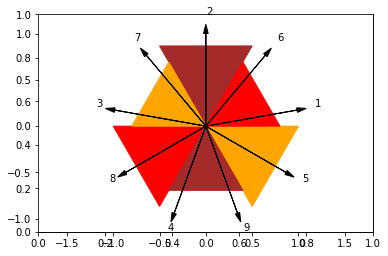

1
0.9452136366029517
[coil (2, 4, 1), coil (4, 6, -1), coil (9, 2, -1)]


In [23]:
# here we can check some specific case when needed....

# Let define some data...
m = 3;  # Number of phases
Q = 9; # Number of slots
p = 2;  # Number of pole pairs

from dolomites import koil

sos = koil.star_of_slot(m, Q, p);
sos.create_sectors();
sos.plot()
print(sos.t)

# we create an ampty winding
w = koil.m_phase_winding() 

# we ask the sos to populate the winding
sos.populate_winding(w);

# we can then 
print(w.windings[0].get_kw())
print(w.windings[0].coils)
